In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings 
warnings.filterwarnings('ignore')  

In [2]:
df = pd.read_csv("C:/Users/Hrushikesh/Desktop/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.columns.tolist()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

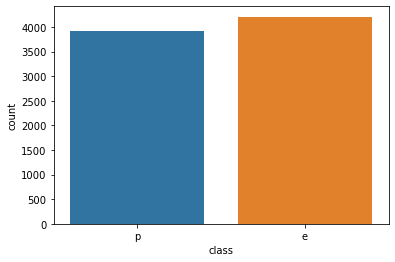

In [7]:
sns.countplot(df['class'])

<AxesSubplot:xlabel='population', ylabel='count'>

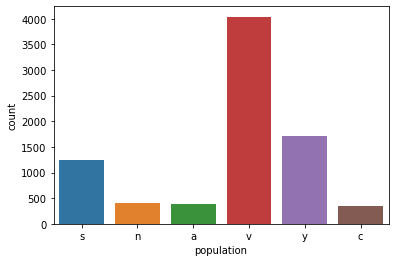

In [8]:
sns.countplot(df['population'])

<AxesSubplot:xlabel='habitat', ylabel='count'>

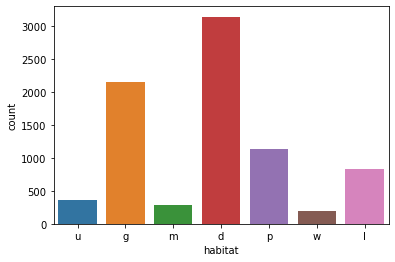

In [9]:
sns.countplot(df['habitat'])

<AxesSubplot:xlabel='odor', ylabel='count'>

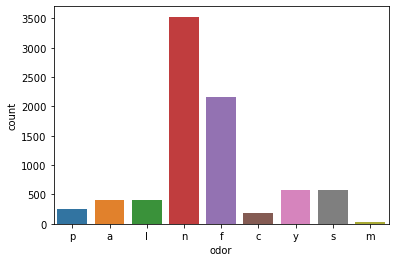

In [10]:
sns.countplot(df['odor'])

# Dividing Data Into Features And Labels

In [11]:
x = df.iloc[:,[5,-2,-1]].values  #odor, population, habitat 

In [12]:
y = df.iloc[:,0].values  #class

In [13]:
x.shape

(8124, 3)

In [14]:
x

array([['p', 's', 'u'],
       ['a', 'n', 'g'],
       ['l', 'n', 'm'],
       ...,
       ['n', 'c', 'l'],
       ['y', 'v', 'l'],
       ['n', 'c', 'l']], dtype=object)

In [15]:
y

array(['p', 'e', 'e', ..., 'e', 'p', 'e'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

In [27]:
cTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0,1,2])], remainder = 'passthrough')
x = cTransformer.fit_transform(x).toarray()

### Using Binary Classification as their are only two outcomes

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=322)

In [40]:
x_train.shape

(6093, 22)

In [41]:
lg= LogisticRegression()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors = 2, p=5)
model = [lg,dtc,knn]

In [42]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuaracy_score of", m , "is:")
    print(accuracy_score(y_test,predm))
    print("classification_report: \n ",classification_report(y_test,predm))
    print("confusion_matrix :\n ",confusion_matrix(y_test,predm))
    print('\n')

Accuaracy_score of LogisticRegression() is:
0.9940915805022157
classification_report: 
                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1028
           1       1.00      0.99      0.99      1003

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

confusion_matrix :
  [[1028    0]
 [  12  991]]


Accuaracy_score of DecisionTreeClassifier() is:
0.9940915805022157
classification_report: 
                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1028
           1       1.00      0.99      0.99      1003

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

confusion_matrix :
  [[1028    0]
 [  12  991]]


Accuaracy_score of KNeighborsClassifier(n_neighbors=2, p=5) is:


## Saving the Model

In [43]:
import joblib
joblib.dump(knn,'knnmodel.obj')


['knnmodel.obj']

In [44]:
knnmodel = joblib.load('knnmodel.obj')

## Conclusion

In [46]:
a = np.array(y_test)
predicted = np.array(knnmodel.predict(x_test))
df_con = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_con


,Original,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2026,0,0
2027,0,0
2028,1,1
2029,1,1
